In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image

In [2]:
#讀取資料
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [3]:
#印出前五筆資料做觀察
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#將Id SalePrice移除
train = trainData.drop(columns = ["Id", "SalePrice"])
test = testData.drop(columns = ["Id"])

In [5]:
#把訓練資料與測試資料結合做前處理
data = pd.concat([train, test])

In [6]:
#將數值型資料空值補平均值
for i in data:
    if not(data[i].dtypes == 'O'):
        data[i].fillna(value = data[i].mean(), inplace = True)

In [7]:
#查看剩餘空值
data.isnull().sum().sort_values(ascending = False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
SaleType            1
Exterior1st         1
Electrical          1
KitchenQual         1
Exterior2nd         1
RoofMatl            0
Foundation          0
ExterCond           0
MasVnrArea          0
YearRemodAdd        0
ExterQual           0
RoofStyle           0
                 ... 
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
GarageYrBlt         0
Fireplaces          0
TotRmsAbvG

In [8]:
#將剩餘空值做One-Hot Encoding
oheData = data
for i in data:
    if (data[i].dtypes == 'O'):
        oheData = pd.concat([oheData, pd.get_dummies(data[i], prefix = i)], axis = 1)
        oheData.drop(columns = [i], axis = 1, inplace = True)
        

In [9]:
#將資料重新分為訓練資料與測試資料
traindata = oheData[:train.shape[0]]
testdata = oheData[train.shape[0]:]

In [10]:
#將房價加入訓練資料
tempData = pd.concat([traindata, trainData["SalePrice"]], axis = 1)

In [11]:
#移除與房價關聯性較低的資料
corr = tempData.corr()
temp = corr["SalePrice"].where(abs(corr["SalePrice"]) < 0.25)
temp = temp.dropna()
for i in temp.index:
    tempData.drop(columns = i, axis = 1, inplace = True)
    testdata.drop(columns = i, axis = 1, inplace = True)
tempData.drop(columns = "SalePrice", axis = 1, inplace = True)

c:\users\jieyu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
tempData

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,GarageCond_TA,SaleType_New,SaleCondition_Partial
0,65.000000,8450,7,2003,2003,196.0,706.0,856.0,856,854,...,0,0,0,1,0,0,0,1,0,0
1,80.000000,9600,6,1976,1976,0.0,978.0,1262.0,1262,0,...,1,0,0,1,0,0,0,1,0,0
2,68.000000,11250,7,2001,2002,162.0,486.0,920.0,920,866,...,0,0,0,1,0,0,0,1,0,0
3,60.000000,9550,7,1915,1970,0.0,216.0,756.0,961,756,...,0,0,1,0,1,0,1,1,0,0
4,84.000000,14260,8,2000,2000,350.0,655.0,1145.0,1145,1053,...,0,0,0,1,0,0,0,1,0,0
5,85.000000,14115,5,1993,1995,0.0,732.0,796.0,796,566,...,1,0,0,1,0,0,1,1,0,0
6,75.000000,10084,8,2004,2005,186.0,1369.0,1686.0,1694,0,...,0,0,1,1,0,0,0,1,0,0
7,69.305795,10382,7,1973,1973,240.0,859.0,1107.0,1107,983,...,1,0,0,1,0,0,0,1,0,0
8,51.000000,6120,7,1931,1950,0.0,0.0,952.0,1022,752,...,1,0,0,0,1,0,1,1,0,0
9,50.000000,7420,5,1939,1950,0.0,851.0,991.0,1077,0,...,1,0,0,1,0,0,0,1,0,0


In [13]:
#將訓練資料切割
trainlabel = trainData["SalePrice"]
trainlabel = trainlabel.to_frame()
XTrain, XTest, yTrain, yTest = train_test_split(tempData, trainlabel, test_size = 0.2, random_state = 0)

In [14]:
#使用RandomForestRegressor做訓練
RF = RandomForestRegressor(n_estimators = 100, max_features = 'log2')
RF.fit(XTrain, yTrain)

c:\users\jieyu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
#對策是資料做預測
result = RF.predict(testdata)
ID = testData.Id

In [16]:
#將結果寫入csv
submission = pd.DataFrame({'Id': ID, 'SalePrice': result})
submission.to_csv('submission.csv', index = False)

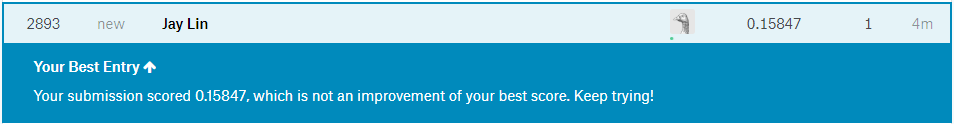

In [17]:
#kaggle分數
Image(filename="kaggle.PNG")